In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel(r"C:\Users\vyshn\Downloads\Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Handling Null Values
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Describing our Dataset
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
# Counting Values 
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [10]:
# Counting Values 
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [11]:
# Counting Values 
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [12]:
# Counting Values 
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [13]:
#converting the Date_of_Journey to 'datetime'
df['Date_of_Journey'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
print(df.Date_of_Journey.dtype)

datetime64[ns]


In [15]:
#Extracting day & creating new columns Journey_day
df['Journey_day'] = df['Date_of_Journey'].dt.day

#extracting month & creating new columns Journey_day
df['Journey_month'] = df['Date_of_Journey'].dt.month

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time,format ="mixed" )

In [18]:
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

In [19]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [20]:
df['Dep_Time'] = pd.to_datetime(df.Dep_Time,format = "mixed")
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-09-16 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-16 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-16 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-09-16 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-09-16 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [21]:
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-09-16 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-16 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-16 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-09-16 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-09-16 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [23]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [24]:

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time
# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [25]:
df['Duration_hours'] = duration_hours
df['Duration_minutes'] = duration_mins
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [26]:
df.drop(['Duration'], axis=1, inplace=True)

C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


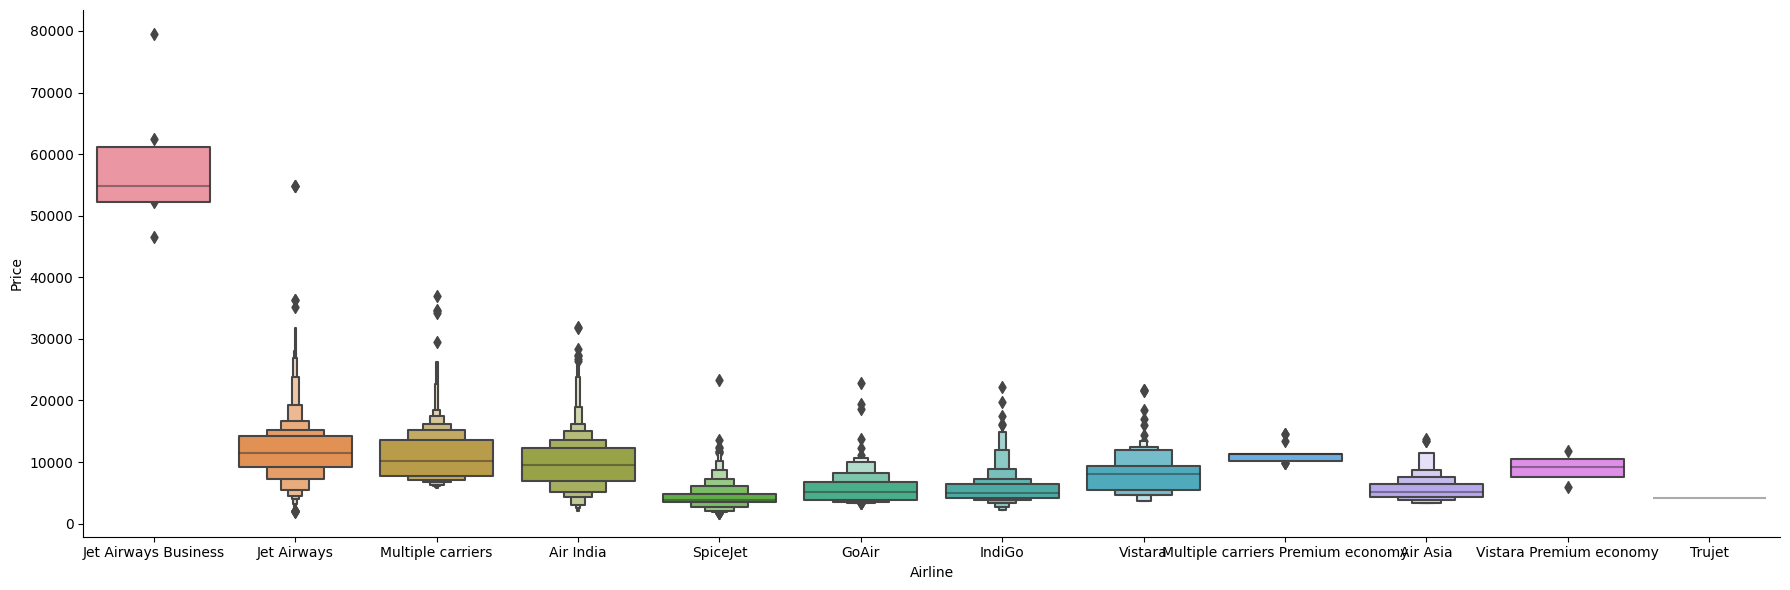

In [27]:
# Graph of Airline vs Price
sns.catplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [28]:
Airline = df['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


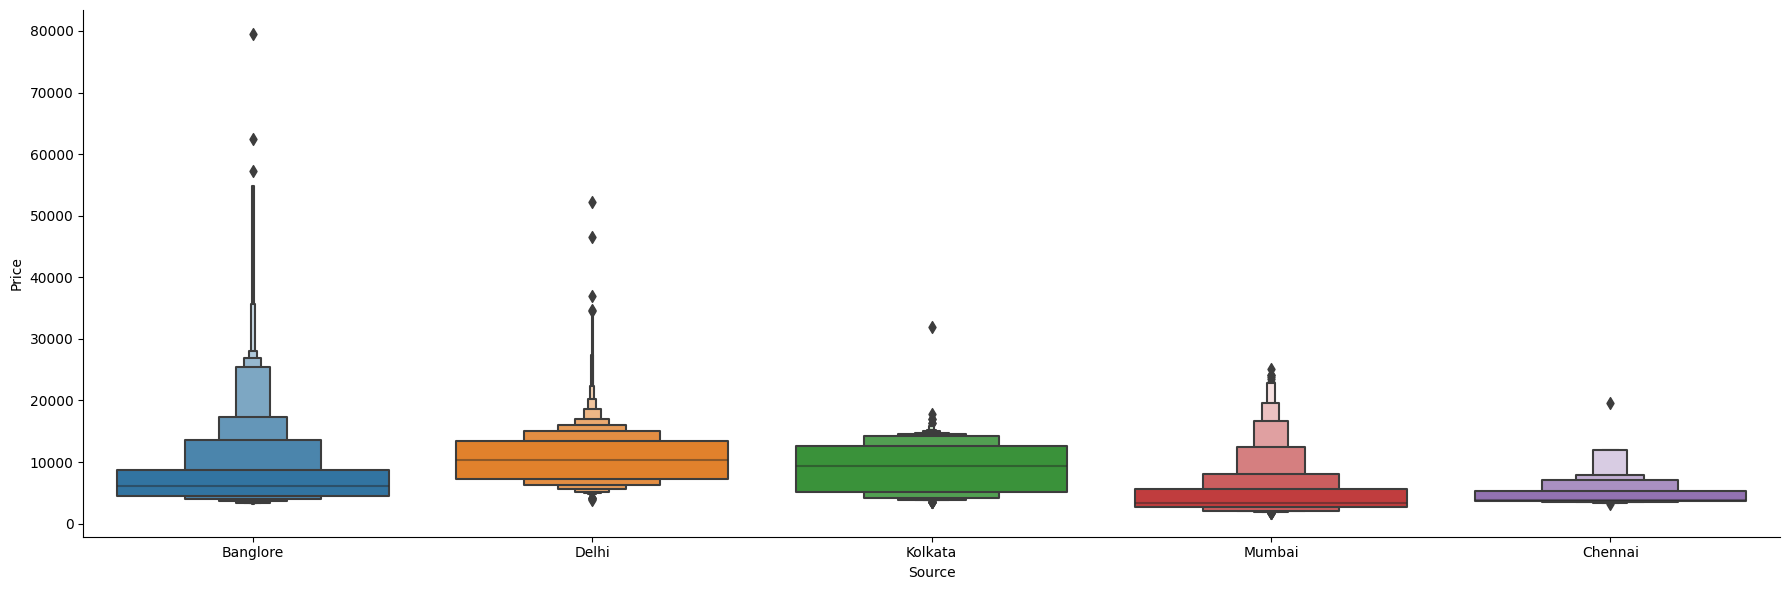

In [29]:
# Graph of Source vs Price
sns.catplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [31]:
Source = df['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


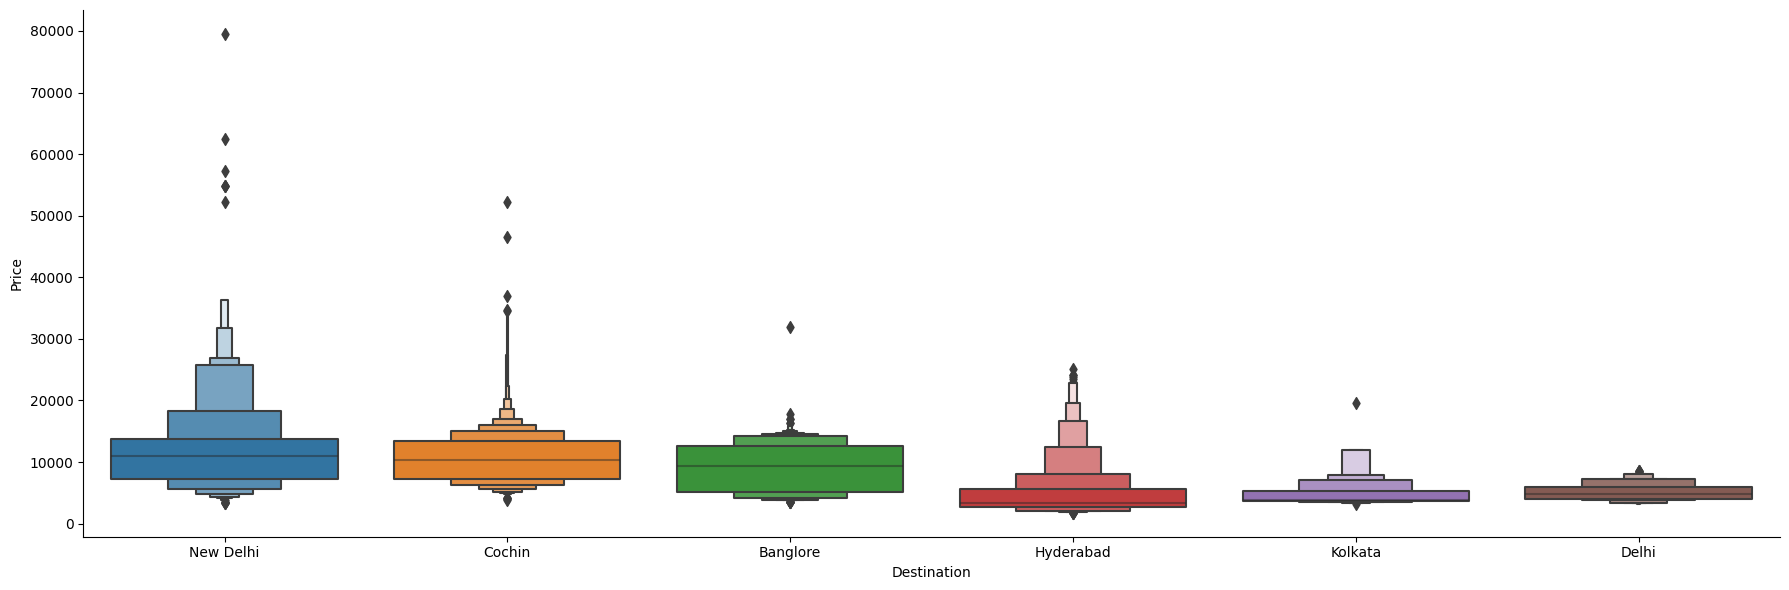

In [32]:
# Graph of Destination vs Price
sns.catplot(y='Price', x='Destination', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [33]:
Destination = df['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [34]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [35]:
df.drop(['Route'], axis=1, inplace=True)

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45


C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


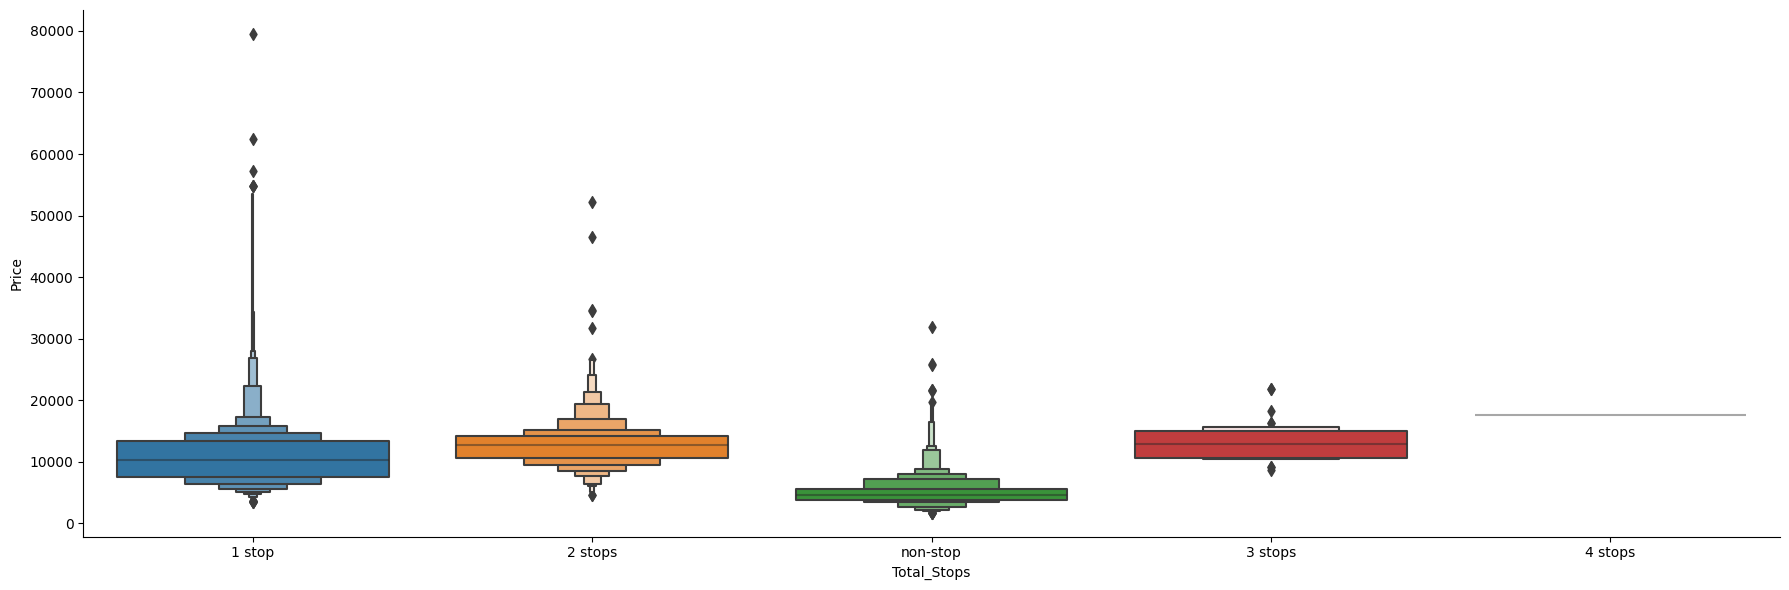

In [37]:
# Graph of Total_Stops vs Price
sns.catplot(y='Price', x='Total_Stops', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [38]:
# Here Total_stop are categorical so we are converting or replacing to 1,2,3,4 in form of Dict
df.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,4,45


In [39]:
# Droping Additional_Info bcz here no relation 
df.drop(['Additional_Info'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


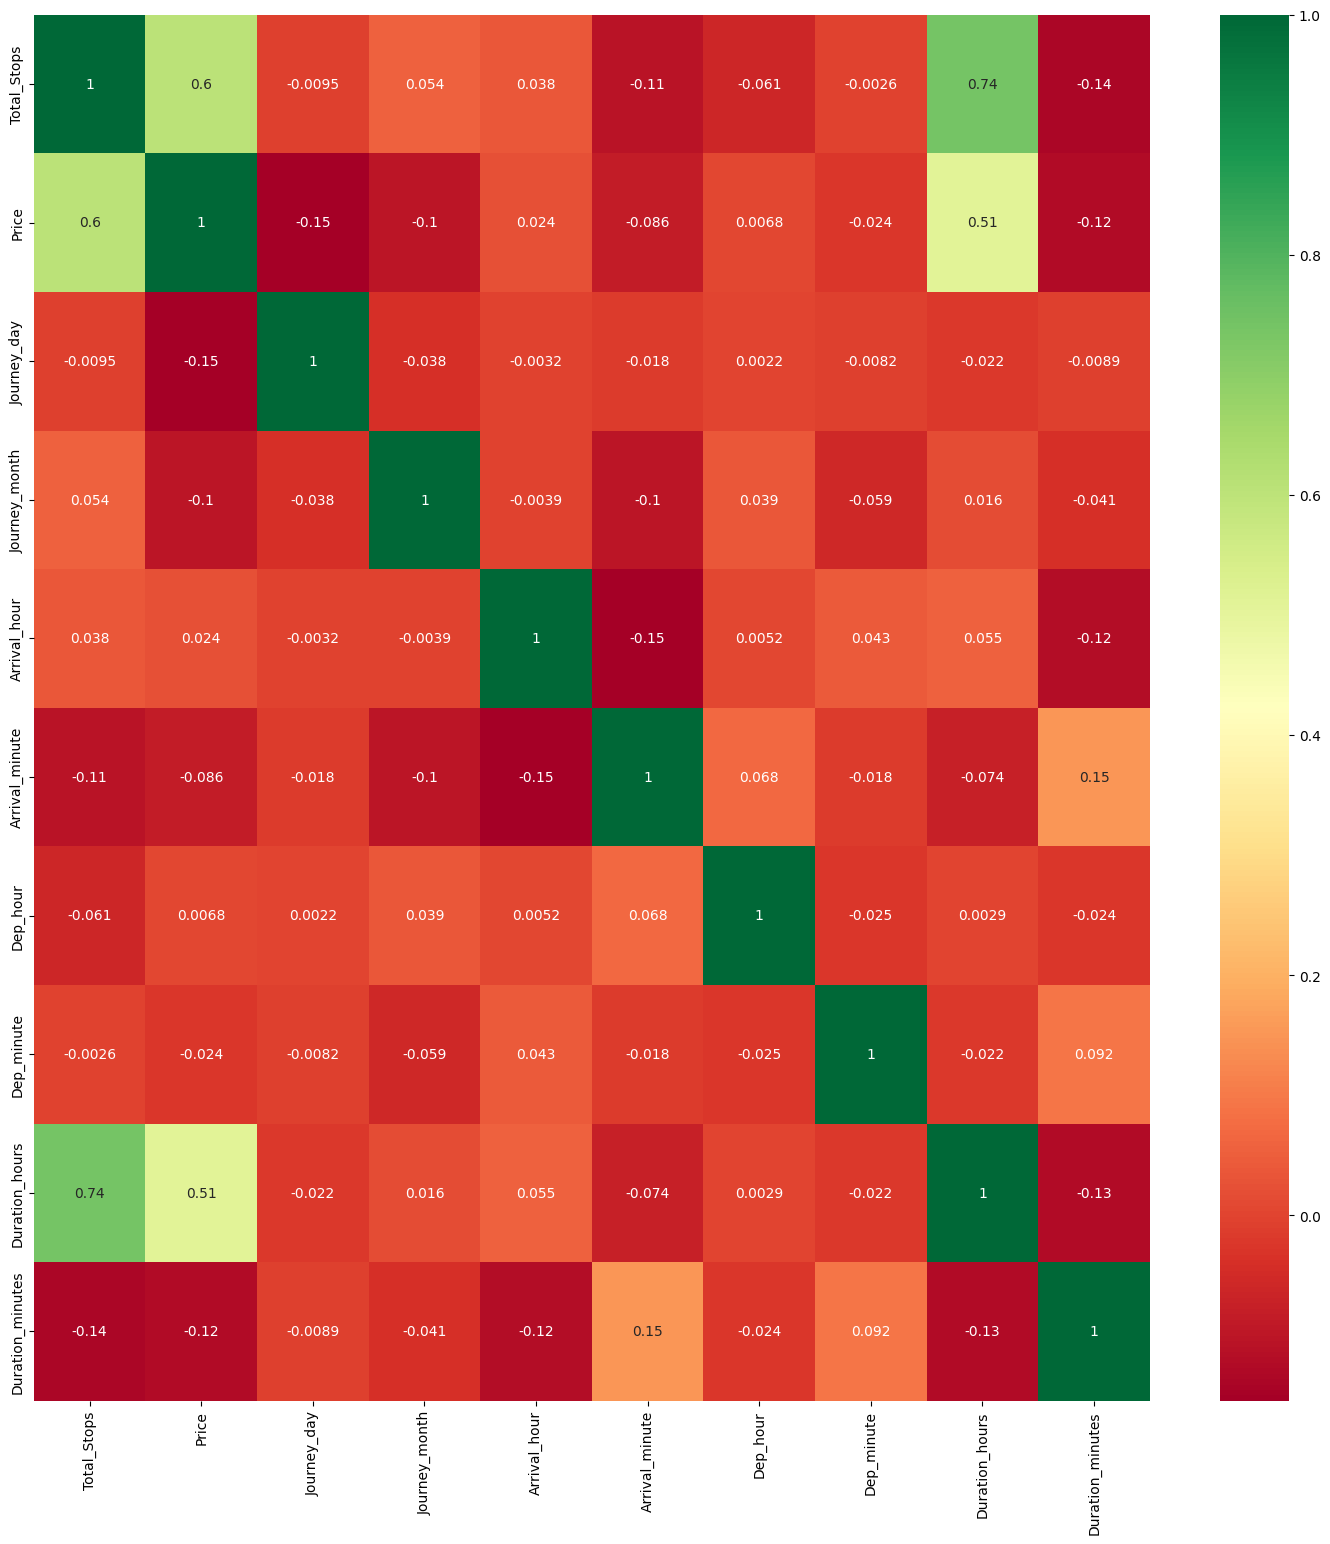

In [40]:
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="RdYlGn")
plt.show()


In [41]:
# Conactenate Dataframe
df1 = pd.concat([df, Airline, Source, Destination], axis=1)
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,False,False,False,False,False,False,False,False,False,True


In [42]:
# Here we are droping 'Airline', 'Source', 'Destination' because no need for training this columns.
df1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,13,15,5,50,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,4,25,9,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,23,30,18,5,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,21,35,16,50,4,45,...,False,False,False,False,False,False,False,False,False,True


In [43]:
df1.shape

(10682, 30)

In [44]:
df_test = pd.read_excel(r"C:\Users\vyshn\Downloads\Test_set (1).xlsx")

In [45]:
df_test.shape

(2671, 10)

In [46]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [47]:
df_test.dropna(inplace=True)

In [48]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [49]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [50]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y')

In [51]:
df_test['Journey_day'] = df_test['Date_of_Journey'].dt.day

In [52]:
df_test['Journey_month'] = df_test['Date_of_Journey'].dt.month

In [53]:
df_test.drop(['Date_of_Journey'], axis=1, inplace=True)

In [54]:
df_test['Arrival_Time'] = pd.to_datetime(df_test.Arrival_Time,format ="mixed")

In [55]:

df_test['Arrival_hour'] = df_test['Arrival_Time'].dt.hour

In [56]:
df_test['Arrival_minute'] = df_test['Arrival_Time'].dt.minute

In [57]:
df_test.drop(['Arrival_Time'], axis=1, inplace=True)

In [58]:
df_test['Dep_Time'] = pd.to_datetime(df_test.Dep_Time,format = "mixed")

In [59]:
df_test['Dep_hour'] = df_test['Dep_Time'].dt.hour

In [60]:
df_test['Dep_minute'] = df_test['Dep_Time'].dt.minute

In [61]:
df_test.drop(['Dep_Time'], axis=1, inplace=True)

In [62]:
# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
df_test['Duration_hours'] = duration_hours
df_test['Duration_minutes'] = duration_mins

In [63]:
df_test.drop(['Duration'], axis=1, inplace=True)

In [64]:
Airline = df_test['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

In [65]:
Source = df_test['Source']
Source = pd.get_dummies(Source, drop_first=True)

In [66]:
Destination = df_test['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [67]:
df_test.drop(['Route'], axis=1, inplace=True)

In [68]:
df_test.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,2,50


In [69]:
df_test.drop(['Additional_Info'], axis=1, inplace=True)

In [70]:
df_test = pd.concat([df_test, Airline, Source, Destination], axis=1)

In [71]:
df_test.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [72]:
print(df_test.shape)

(2671, 28)


In [73]:
print(df_test.columns)
print(df.columns)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')
Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_minute',
       'Dep_hour', 'Dep_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')


In [74]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,False,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,10,20,6,20,4,0,False,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,0,19,15,23,45,False,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,21,0,8,0,13,0,False,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,2,45,23,55,2,50,False,...,False,False,False,False,False,False,True,False,False,False


In [75]:
df1.shape

(10682, 30)

In [76]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [77]:
X = df1.drop(['Price'], axis=1)
Y = df1['Price']
X.head()
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [79]:
print(select.feature_importances_)

[2.30100929e-01 1.44672836e-01 5.32789457e-02 2.81525675e-02
 1.87143080e-02 2.47833488e-02 2.13586606e-02 1.11197865e-01
 1.74167017e-02 9.10524583e-03 1.77136570e-03 1.69895686e-02
 1.39126792e-01 6.77880256e-02 1.97314466e-02 8.98245040e-04
 3.04604156e-03 1.05837082e-04 4.96637691e-03 9.36145761e-05
 4.39828422e-04 1.71500176e-02 3.45280348e-03 7.02693196e-03
 7.46159964e-03 1.80063622e-02 8.14708118e-03 4.69166334e-04
 2.45474877e-02]


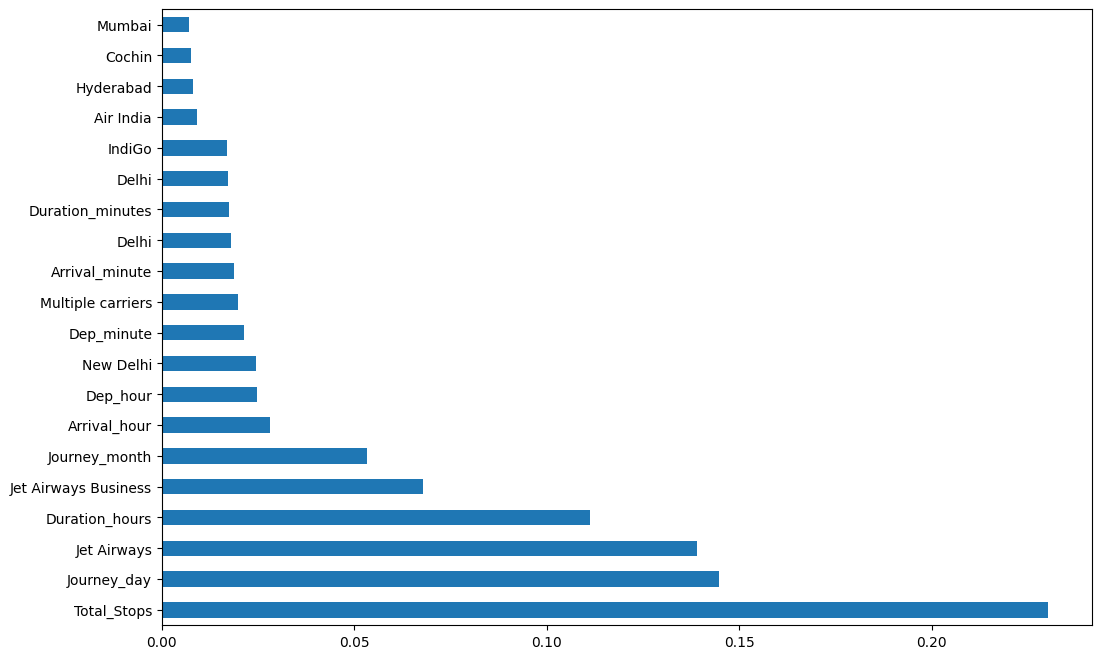

In [80]:
plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

In [81]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [83]:
Y_pred = RF_reg.predict(X_test)

In [84]:
RF_reg.score(X_train, Y_train)

0.9532621547164046

In [85]:
RF_reg.score(X_test, Y_test)

0.7966494483996481

In [86]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [87]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [101]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\vyshn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [91]:
prediction = rf_random.predict(X_test)

In [92]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1262.8920196627046
MSE: 3895898.320473
RMSE: 1973.8030095409724


In [93]:
import joblib

In [94]:
filename = 'flight_pred.sav'
joblib.dump(rf_random, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

-3895898.320473


In [95]:
import pickle
with open('flight_pred.pkl','wb') as file:
    pickle.dump(rf_random, file)
#file = open('flight_pred.pkl', 'wb')
#pickle.dump(rf_random, file)

In [96]:
with open('flight_pred.pkl', 'rb') as model:
    forest = pickle.load(model)
#model = open('flight_pred.pkl','rb')
#forest = pickle.load(model)

In [97]:
Y_prediction = forest.predict(X_test)

In [98]:
metrics.r2_score(Y_test, Y_prediction)

0.8193169398176845

In [99]:
import warnings

In [100]:
warnings.filterwarnings("ignore", category=UserWarning)